
The idea of a transformation can seem more complicated than it really is at first, but after 10+ examples we would embrace some intuitive understanding.

So, firstly let's reiterate the formal definition of **linear transformation**.

# Linear Transformation
## Formal definition
Let $V$ and $W$ be vector spaces over a field $\mathbb{K}$. The function $f: V \rightarrow W$ is a **linear transformation** if for all $\vec{u}, \vec{v} \in V$ and all $ \lambda , \mu \in \mathbb{K} $, we have:

1. $f(u + v) = f(u) + f(v)$
2. $f(\lambda u) = \lambda f(u)$

## Informal definition
If we put aside for a moment the "linearity" (e.g. the two special requirements, mentioned above), we can think of transformation as a function that gets an **input vector** and produces an **output vector**.
Furthermore, we can think of vectors simply as visual points in a vector (point) space.

So, a transformation basically process all these points from space 1 and outputs new (moved) points into space 2.

In regard to the linearity requirements, we can express them visually as:

1. *All lines remain lines*
2. *The origin (0, 0) remains fixed in place*

# Transformation Matrix
Transformations are being represented by a transformation matrix $A$.

For a 2-dimensional vector space it would look like this:

$$ A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}  $$

Where $\begin{pmatrix} a \\ c \end{pmatrix}$ describes the transformation of unit vector $x=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$

and $\begin{pmatrix} b \\ d \end{pmatrix}$ describes the transformation of unit vector $y=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$



## Example - Rotation about the origin
![Rotation transformation](img/rotation_transformation.png)

## Example - Shear 
$\begin{pmatrix} 1&1 \\ 0&1 \end{pmatrix}$

![Shear transformation](img/shear_transformation.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Affine2D

In [2]:
def visualize_transformation(matrix: list[list[float]], plot_title: str):
    """
    Visualize a linear transformation given a 2x2 transformation matrix.
    
    Args:
        matrix: A 2x2 transformation matrix
        plot_title: The title of the plot
    """
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111) # 1x1 grid, first subplot

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    # Why 3x3 matrix?
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)
   
    plt.show()

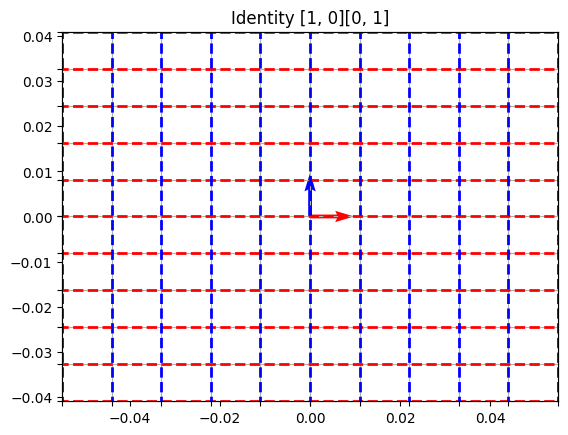

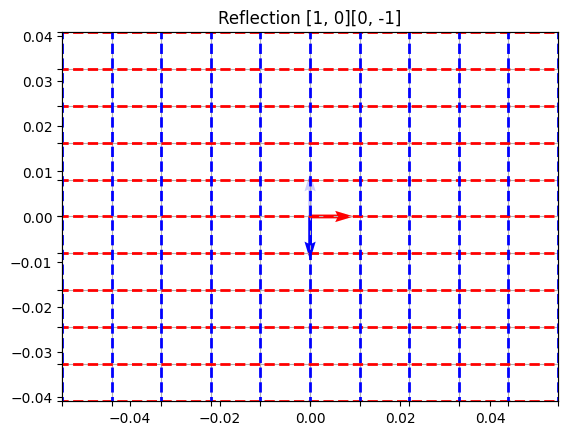

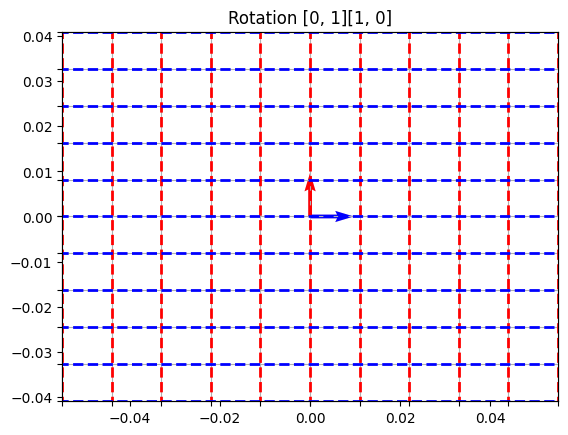

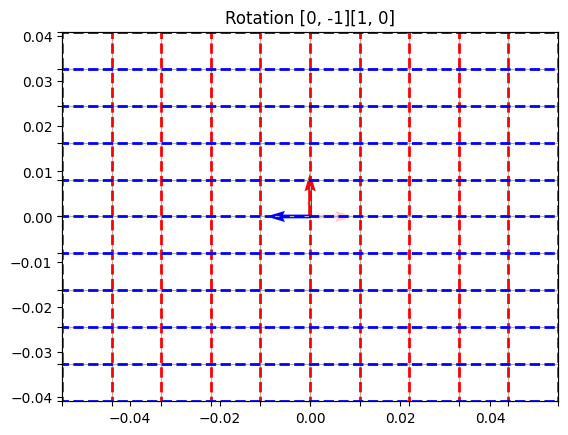

In [3]:
visualize_transformation([
    [1, 0], 
    [0, 1]
], "Identity [1, 0][0, 1]")
visualize_transformation([
    [1, 0], 
    [0, -1]
], "Reflection [1, 0][0, -1]")
visualize_transformation([
    [0, 1], 
    [1, 0]
], "Rotation [0, 1][1, 0]")
visualize_transformation([
    [0, -1], 
    [1, 0]
], "Rotation [0, -1][1, 0]")

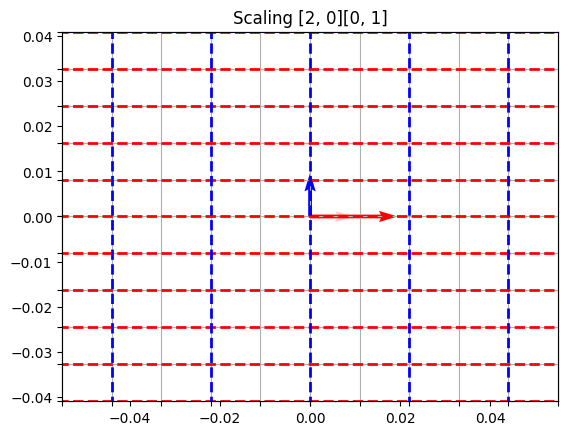

In [4]:
# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, "Scaling [2, 0][0, 1]")

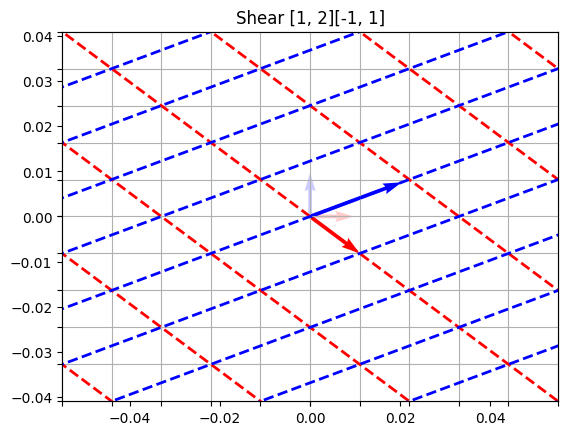

In [5]:
# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, "Shear [1, 2][-1, 1]")

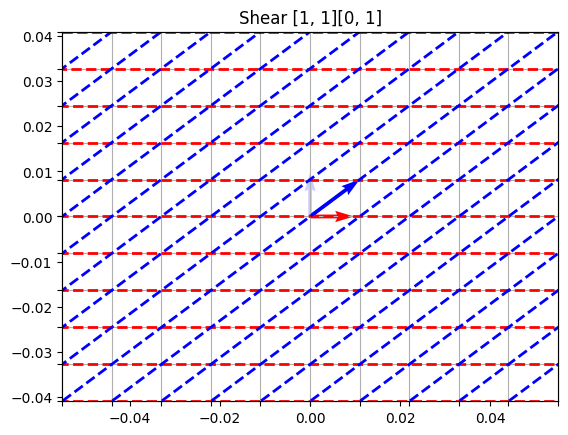

In [6]:
# Shear
matrix = [
    [1, 1],
    [0, 1]
]

visualize_transformation(matrix, "Shear [1, 1][0, 1]")

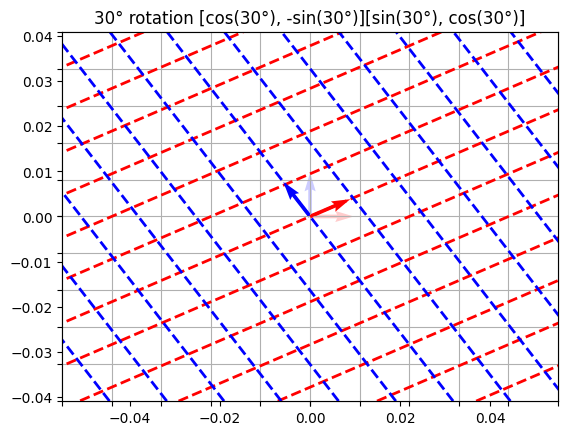

In [7]:
# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, "30° rotation [cos(30°), -sin(30°)][sin(30°), cos(30°)]")

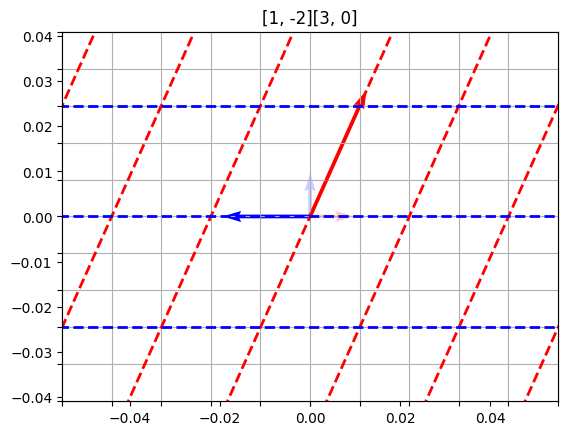

In [8]:
visualize_transformation([[1, -2], [3, 0]], "[1, -2][3, 0]")  

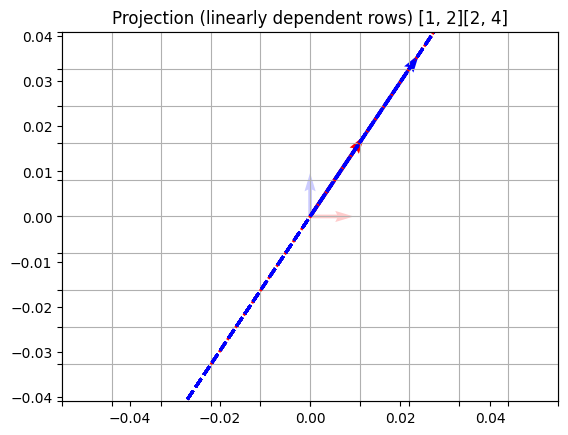

In [9]:
# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4] # Notice that the second row is a multiple of the first row
]

visualize_transformation(matrix, "Projection (linearly dependent rows) [1, 2][2, 4]")

# Identity Matrix

$\begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}$

$\begin{pmatrix} 1&0&0 \\ 0&1&0 \\0&0&1 \end{pmatrix}$

$\begin{pmatrix} 1&0&0&0 \\ 0&1&0&0 \\0&0&1&0 \\0&0&0&1 \end{pmatrix}$

If we multiply an identity matrix $A$ of rank $n$ to a vector $\vec{u}\{u_1,u_2,...,u_n\}$ it results into the same vector $\vec{u}$ .

# Transformation from R^2 to R^3

The transformation here is basically a list of 3 vectors.

![Transformation 1](img/t_r2_r3.png)

We can represent this transformation by a matrix.

![Transformation 2](img/t_r2_r3_2.png)


# Linear Transformation
Let $V$ and $W$ be vector spaces over a field $\mathbb{K}$. The function $f: V \rightarrow W$ is a **linear transformation** if for all $\vec{u}, \vec{v} \in V$ and all $ \lambda , \mu \in \mathbb{K} $, we have:

$$ f(\lambda u + \mu v) = \lambda f(u) + \mu f(v) $$

In real-life many also calls it **linear map** (although there is a slight difference between them).

Transformations are being represented by transformation matrix $A$.

# Linear Transformation vs Linear Function
The difference between linear transformation and linear function is that the first maps vector space $V$ to vector space $W$, while the latter always maps vector space $V$ to a **scalar field** $F$. In other words the co-domain of a linear function is a field.

# Nullspace (Kernel)
The **kernel of a linear map**, also known as the **null space** or **nullspace**, is the part of the domain which is mapped to the zero vector of the co-domain; the kernel is always a linear subspace of the domain.

In other words, nullspace of a transformation matrix $A$ is the vector space of all $\vec{u} \in V$ such that $A\vec{u}=0$ .

# Dimension vs Rank

### Dimension
The dimension of a vector space is simply the cardinality (i.e. the number of vectors) of a basis (2, 3, etc.).

### Rank
Rank is defined if you have a linear transformation (a matrix $A$). The rank of a $A$ is the max number of linearly independent columns of $A$.

For example the matrix 
$$ 
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 1\\
0 & 1 & 1
\end{bmatrix}
$$

has rank 2: the first two columns are linearly independent, so the rank is at least 2, but since the third is a linear combination of the first two (the first column plus the second), the three columns are linearly dependent so the rank must be less than 3.

The matrix
$$ 
\begin{bmatrix}
1 & 1 & 0 & 2\\
-1 & -1 & 0 & -2
\end{bmatrix}
$$

has rank 1: there are nonzero columns, so the rank is positive, but any pair of columns is linearly dependent. 

Similarly, the transpose

$$ 
\begin{bmatrix}
1 & -1 \\
1 & -1 \\
0 & 0 \\
2 & -2 \\
\end{bmatrix}
$$

has rank 1 too. The statement that the *column rank* of a matrix equals its *row rank* is equivalent to the statement that the rank of a matrix is equal to the rank of its transpose, i.e., $rank(A) = rank(AT)$.

# Observations
* Matrix product with vector is always a linear transformation.

# References
* [(Video) Linear transformations | Matrix transformations](https://www.youtube.com/watch?v=4PCktDZJH8E)
* [(Video) Linear transformations and matrices ](https://www.youtube.com/watch?v=kYB8IZa5AuE)
* [Matrix vector product](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/v/matrix-vector-products-as-linear-transformations)
* [Linear transformations as matrix vector products](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/v/linear-transformations-as-matrix-vector-products)